In [5]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [55]:
NOSE = 0
LEFT_EYE_INNER = 1
LEFT_EYE = 2
LEFT_EYE_OUTER = 3
RIGHT_EYE_INNER = 4
RIGHT_EYE = 5
RIGHT_EYE_OUTER = 6
LEFT_EAR = 7
RIGHT_EAR = 8
MOUTH_LEFT = 9
MOUTH_RIGHT = 10
LEFT_SHOULDER = 11
RIGHT_SHOULDER = 12
LEFT_ELBOW = 13
RIGHT_ELBOW = 14
LEFT_WRIST = 15
RIGHT_WRIST = 16
LEFT_PINKY = 17
RIGHT_PINKY = 18
LEFT_INDEX = 19
RIGHT_INDEX = 20
LEFT_THUMB = 21
RIGHT_THUMB = 22
LEFT_HIP = 23
RIGHT_HIP = 24
LEFT_KNEE = 25
RIGHT_KNEE = 26
LEFT_ANKLE = 27
RIGHT_ANKLE = 28
LEFT_HEEL = 29
RIGHT_HEEL = 30
LEFT_FOOT_INDEX = 31
RIGHT_FOOT_INDEX = 32

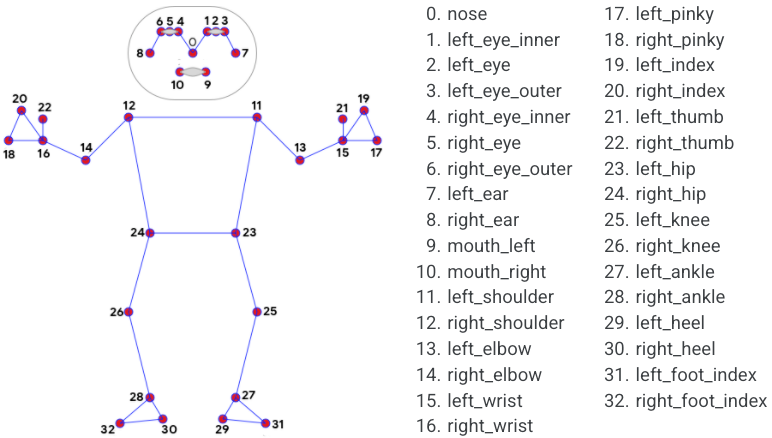

In [93]:

cap = cv2.VideoCapture('../raw_data/jiggle.mp4')
## Setup mediapipe instance

pl_list = []
with mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        
        ret, frame = cap.read()
        if ret == False:
            cap.release()
            cv2.destroyAllWindows()
            break
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks
        interim = []
        try:
            landmarks = results.pose_landmarks.landmark
            
            for id, lm in enumerate(landmarks):
                interim.append((lm.x, lm.y, lm.z))
            pl_list.append(interim)
        except:
            pass


        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

In [57]:
pl_list

[[(0.5354580879211426, 0.30369892716407776, -0.4454421103000641),
  (0.5414080023765564, 0.274593323469162, -0.4241277575492859),
  (0.5459654331207275, 0.27139025926589966, -0.4241933226585388),
  (0.5500738620758057, 0.26848602294921875, -0.42439985275268555),
  (0.5243530869483948, 0.2800167500972748, -0.42435771226882935),
  (0.5181183218955994, 0.2808043658733368, -0.4243623614311218),
  (0.5134333372116089, 0.2814039885997772, -0.42439693212509155),
  (0.5561161637306213, 0.27156808972358704, -0.2761025130748749),
  (0.5057209134101868, 0.2897818982601166, -0.2773840129375458),
  (0.5458104014396667, 0.3237171769142151, -0.38777750730514526),
  (0.5269953012466431, 0.32941269874572754, -0.38844162225723267),
  (0.5974661707878113, 0.38760167360305786, -0.18563081324100494),
  (0.47466427087783813, 0.42648202180862427, -0.16729356348514557),
  (0.6594024896621704, 0.5258991122245789, -0.38491854071617126),
  (0.435556024312973, 0.608167290687561, -0.33450013399124146),
  (0.628009

In [58]:
pl_array = np.array(pl_list)

In [60]:
pl_array.shape

(530, 33, 3)

In [82]:
pl_array[0, 16]-pl_array[0,17]

array([-0.15771729,  0.09162748,  0.09175211])

In [62]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(a,b,c):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(a-b)
    v2_u = unit_vector(c-b)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [102]:
def angles(data):
    return (angle_between(data[LEFT_WRIST], data[LEFT_ELBOW], data[LEFT_SHOULDER]),\
    angle_between(data[LEFT_HIP], data[LEFT_SHOULDER], data[LEFT_ELBOW]),\
    angle_between(data[LEFT_SHOULDER], data[LEFT_HIP], data[LEFT_KNEE]),\
    angle_between(data[LEFT_HIP], data[LEFT_KNEE], data[LEFT_ANKLE]),\
    angle_between(data[LEFT_KNEE], data[LEFT_ANKLE], data[LEFT_FOOT_INDEX]),\
    angle_between(data[RIGHT_WRIST], data[RIGHT_ELBOW], data[RIGHT_SHOULDER]),\
    angle_between(data[RIGHT_HIP], data[RIGHT_SHOULDER], data[RIGHT_ELBOW]),\
    angle_between(data[RIGHT_SHOULDER], data[RIGHT_HIP], data[RIGHT_KNEE]),\
    angle_between(data[RIGHT_HIP], data[RIGHT_KNEE], data[RIGHT_ANKLE]),\
    angle_between(data[RIGHT_KNEE], data[RIGHT_ANKLE], data[RIGHT_FOOT_INDEX]))
    
    



In [104]:
angles_frames = []
for i in pl_array:
    angles_frames.append(angles(i))

angles_frames

[(2.1341381008331948,
  1.491179955760637,
  2.0535036382059806,
  1.3201840763050647,
  1.190824497003253,
  1.9476850368247958,
  1.3486291573971783,
  1.8228846398953873,
  1.1458222713084458,
  1.2209391541422385),
 (2.0459267266583083,
  1.1698180122208186,
  2.5819846868438745,
  1.6506489533062128,
  1.3163504369593255,
  1.8792976362061116,
  1.0651933761316608,
  2.4658859635185766,
  1.6808950488789092,
  1.298569984688994),
 (2.098463179588873,
  1.1310424276857238,
  2.7858314225253697,
  1.8201797375521345,
  1.2731920089478879,
  1.9256279510640972,
  1.051868786869394,
  2.5339257955981522,
  1.6422324216698556,
  1.343367272509445),
 (2.190563090477451,
  1.03315269826657,
  2.731102335382865,
  1.8790897095370265,
  1.2537242399249107,
  2.1722370215772706,
  1.0852614595613723,
  2.8288706927623366,
  1.9908628577118734,
  1.1991762624971618),
 (2.221127509391992,
  0.9361962279581973,
  2.6503868809042297,
  1.6918677812659455,
  1.2574741548883757,
  2.1957919922607